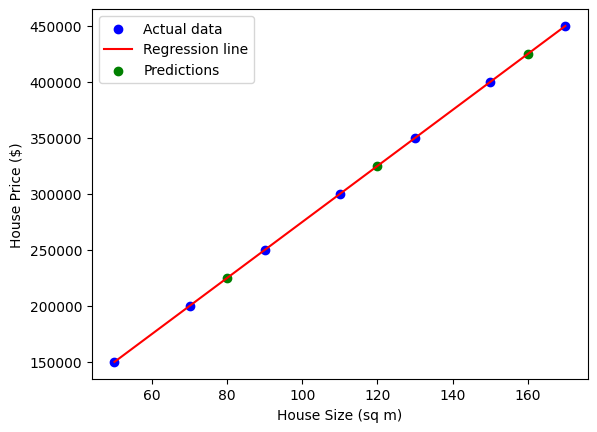

Predicted prices for houses of size 80, 120, and 160 sq m: [225000. 325000. 425000.]


In [20]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Sample data
X = np.array([50, 70, 90, 110, 130, 150, 170]).reshape(-1, 1)  # House size (sq m)
y = np.array([150000, 200000, 250000, 300000, 350000, 400000, 450000])  # House price

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Make predictions
X_new = np.array([80, 120, 160]).reshape(-1, 1)
y_pred = model.predict(X_new)

# Plot the results
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, model.predict(X), color='red', label='Regression line')
plt.scatter(X_new, y_pred, color='green', label='Predictions')
plt.xlabel('House Size (sq m)')
plt.ylabel('House Price ($)')
plt.legend()
plt.show()

print(f"Predicted prices for houses of size 80, 120, and 160 sq m: {y_pred}")


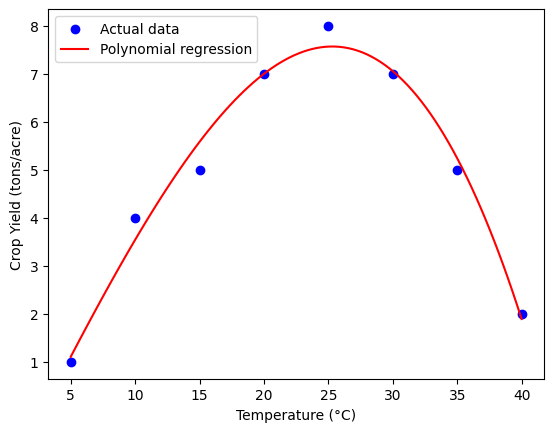

Predicted yield at 22°C: 7.34 tons/acre


In [21]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Sample data
X = np.array([5, 10, 15, 20, 25, 30, 35, 40]).reshape(-1, 1)  # Temperature (°C)
y = np.array([1, 4, 5, 7, 8, 7, 5, 2])  # Crop yield (tons/acre)

# Create and fit the model
degree = 3
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X, y)

# Generate points for smooth curve
X_smooth = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_smooth = model.predict(X_smooth)

# Plot the results
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X_smooth, y_smooth, color='red', label='Polynomial regression')
plt.xlabel('Temperature (°C)')
plt.ylabel('Crop Yield (tons/acre)')
plt.legend()
plt.show()

# Predict yield for a new temperature
new_temp = np.array([22]).reshape(-1, 1)
predicted_yield = model.predict(new_temp)
print(f"Predicted yield at 22°C: {predicted_yield[0]:.2f} tons/acre")


In [22]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Sample data
X = np.array([[2, 50], [4, 70], [6, 80], [8, 90], [10, 85],
              [1, 40], [3, 60], [5, 75], [7, 80], [9, 95]])
y = np.array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1])  # 0: Fail, 1: Pass

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

# Predict for a new student
new_student = np.array([[5, 65]])
prediction = model.predict(new_student)
print(f"Prediction for new student: {'Pass' if prediction[0] == 1 else 'Fail'}")


Accuracy: 0.6666666666666666
Confusion Matrix:
[[1 1]
 [0 1]]
Prediction for new student: Fail


Accuracy: 1.0


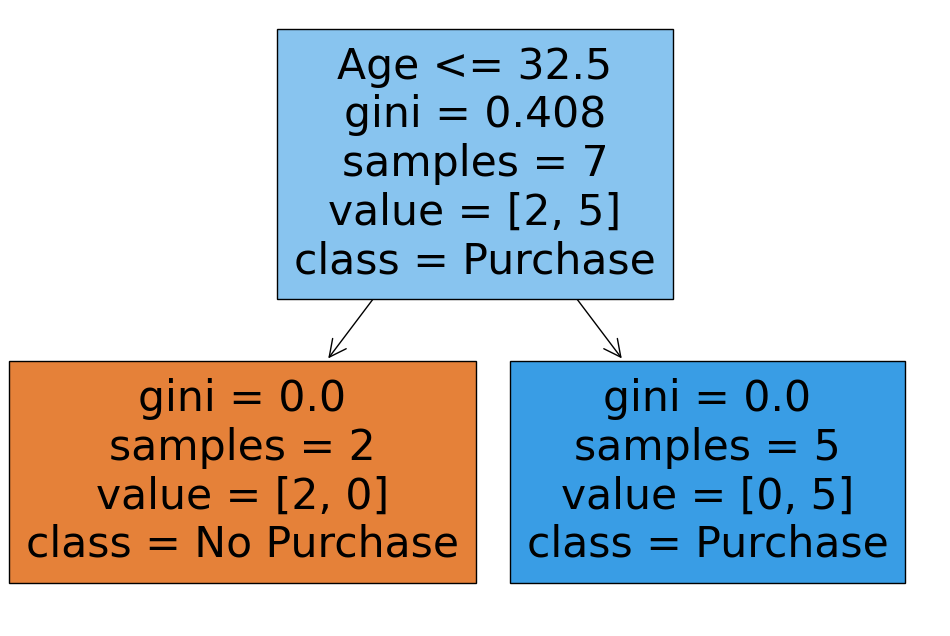

Prediction for new customer: No Purchase


In [23]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Sample data
X = np.array([[25, 40000], [35, 60000], [45, 80000], [20, 20000], [50, 100000],
              [30, 50000], [40, 70000], [55, 110000], [22, 30000], [48, 90000]])
y = np.array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1])  # 0: No purchase, 1: Purchase

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=['Age', 'Salary'], class_names=['No Purchase', 'Purchase'], filled=True)
plt.show()

# Predict for a new customer
new_customer = np.array([[28, 55000]])
prediction = model.predict(new_customer)
print(f"Prediction for new customer: {'Purchase' if prediction[0] == 1 else 'No Purchase'}")


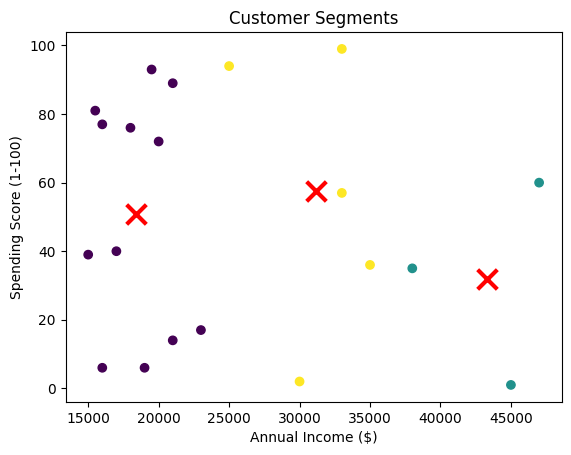

Predicted cluster for new customer: 0


In [24]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Sample data
X = np.array([[15000, 39], [15500, 81], [16000, 6], [16000, 77], [17000, 40],
              [18000, 76], [19000, 6], [19500, 93], [20000, 72], [21000, 14],
              [21000, 89], [23000, 17], [25000, 94], [30000, 2], [33000, 57],
              [33000, 99], [35000, 36], [38000, 35], [45000, 1], [47000, 60]])

# Create and fit the model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Get cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, linewidths=3)
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.show()

# Predict cluster for a new customer
new_customer = np.array([[22000, 50]])
prediction = kmeans.predict(new_customer)
print(f"Predicted cluster for new customer: {prediction[0]}")


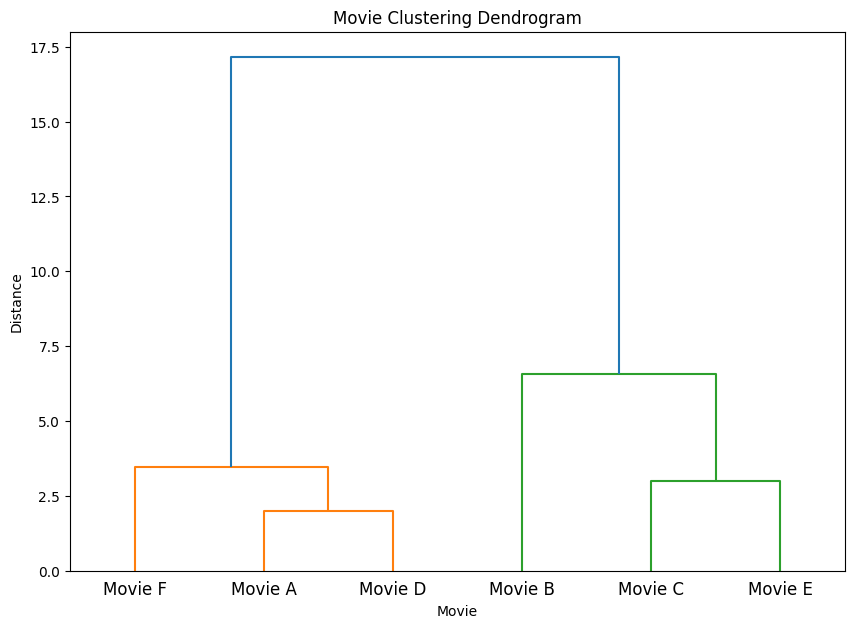

Cluster 1: Movie A, Movie D, Movie F
Cluster 2: Movie C, Movie E
Cluster 3: Movie B


In [25]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Sample data: Movie genre ratings (Action, Comedy, Drama, Sci-Fi)
X = np.array([[8, 2, 4, 7],
              [5, 7, 3, 1],
              [2, 8, 7, 2],
              [9, 1, 3, 8],
              [3, 6, 9, 2],
              [7, 3, 2, 9]])

movie_names = ['Movie A', 'Movie B', 'Movie C', 'Movie D', 'Movie E', 'Movie F']

# Perform hierarchical clustering
linkage_matrix = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=movie_names)
plt.title('Movie Clustering Dendrogram')
plt.xlabel('Movie')
plt.ylabel('Distance')
plt.show()

# Create clusters
n_clusters = 3
clustering = AgglomerativeClustering(n_clusters=n_clusters)
clustering.fit(X)

# Print results
for i in range(n_clusters):
    cluster_movies = [movie_names[j] for j in range(len(movie_names)) if clustering.labels_[j] == i]
    print(f"Cluster {i + 1}: {', '.join(cluster_movies)}")


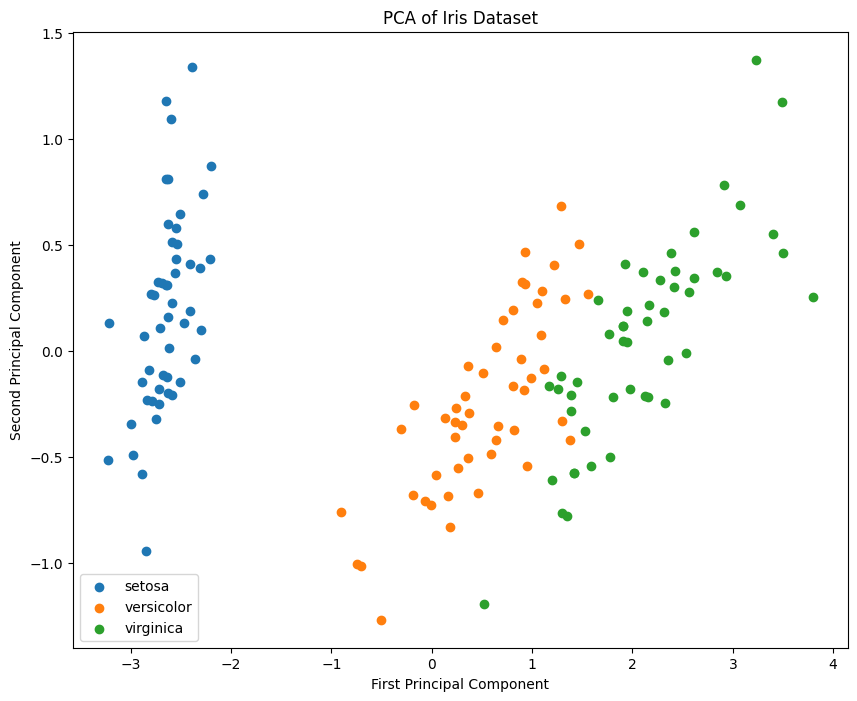

Explained variance ratio: [0.92461872 0.05306648]


In [26]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the results
plt.figure(figsize=(10, 8))
for i, target_name in enumerate(iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.title('PCA of Iris Dataset')
plt.show()

# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)


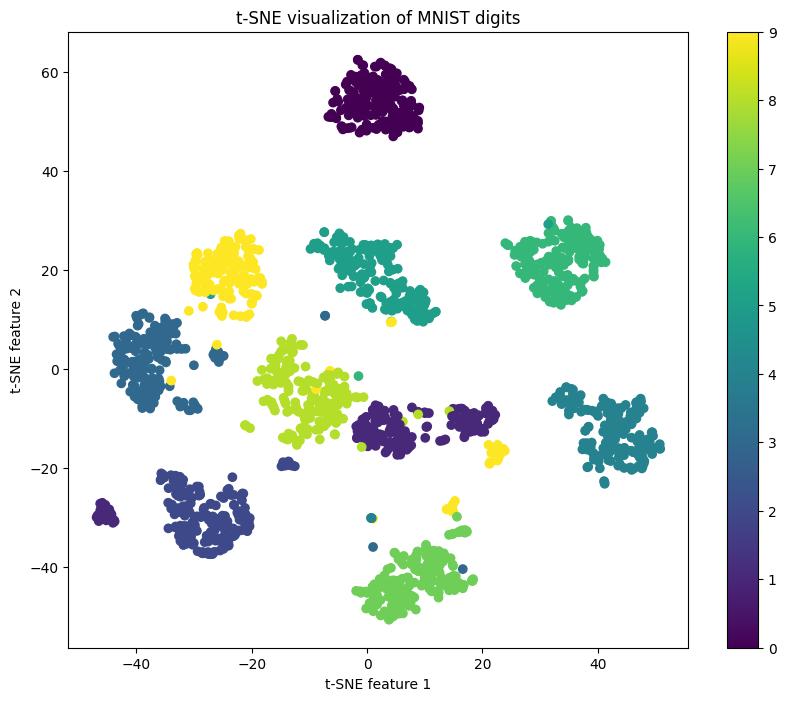

Original data shape: (1797, 64)
t-SNE reduced data shape: (1797, 2)


In [27]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.title('t-SNE visualization of MNIST digits')
plt.show()

# Print some statistics
print("Original data shape:", X.shape)
print("t-SNE reduced data shape:", X_tsne.shape)


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sample dataset (you would typically load this from a CSV file)
data = {
    'size': [1400, 1600, 1700, 1875, 1100, 1550, 2350, 2450, 1425, 1700],
    'bedrooms': [3, 3, 2, 4, 2, 3, 4, 5, 3, 3],
    'location': [1, 1, 2, 3, 1, 2, 2, 3, 1, 2],  # 1: suburban, 2: urban, 3: rural
    'price': [200000, 250000, 220000, 300000, 180000, 240000, 350000, 380000, 210000, 260000]
}

df = pd.DataFrame(data)

# Prepare the features (X) and target variable (y)
X = df[['size', 'bedrooms', 'location']]
y = df['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:.2f}")
print(f"R-squared score: {r2:.2f}")

# Predict price for a new house
new_house = [[1800, 3, 2]]  # 1800 sq ft, 3 bedrooms, urban location
predicted_price = model.predict(new_house)
print(f"Predicted price for the new house: ${predicted_price[0]:.2f}")


Mean squared error: 128318889.36
R-squared score: 0.68
Predicted price for the new house: $263906.95


C:\Users\TEEN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [29]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Sample data
emails = [
    "Get rich quick!", "Buy now, limited offer", "Meeting at 3 PM",
    "Free gift inside", "Project deadline tomorrow", "Discount on luxury watches",
    "Team lunch next week", "You've won a prize", "Conference call in 5 minutes",
    "Enlarge your profits", "Quarterly report attached", "Your package has shipped"
]
labels = np.array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0])  # 1 for spam, 0 for not spam

# Split the data
X_train, X_test, y_train, y_test = train_test_split(emails, labels, test_size=0.3, random_state=42)

# Vectorize the text
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train the model
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

# Make predictions
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

# Predict for a new email
new_email = ["Claim your free trial now!"]
new_email_vectorized = vectorizer.transform(new_email)
prediction = model.predict(new_email_vectorized)
print(f"Prediction for new email: {'Spam' if prediction[0] == 1 else 'Not Spam'}")


Accuracy: 0.5
Confusion Matrix:
[[2 0]
 [2 0]]
Prediction for new email: Spam


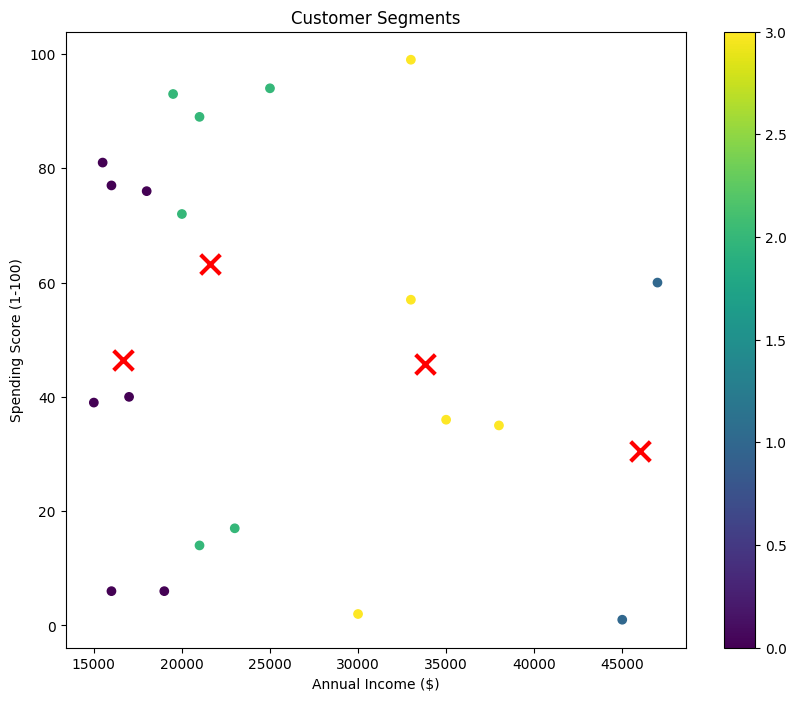

Cluster 1 center: Income $16643, Spending Score 46
Cluster 2 center: Income $46000, Spending Score 30
Cluster 3 center: Income $21583, Spending Score 63
Cluster 4 center: Income $33800, Spending Score 46


In [30]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Sample customer data: [Annual Income ($), Spending Score (1-100)]
customers = np.array([
    [15000, 39], [15500, 81], [16000, 6], [16000, 77], [17000, 40],
    [18000, 76], [19000, 6], [19500, 93], [20000, 72], [21000, 14],
    [21000, 89], [23000, 17], [25000, 94], [30000, 2], [33000, 57],
    [33000, 99], [35000, 36], [38000, 35], [45000, 1], [47000, 60]
])

# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(customers)

# Get cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(customers[:, 0], customers[:, 1], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, linewidths=3)
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.colorbar(scatter)
plt.show()

# Interpret the clusters
for i, center in enumerate(centers):
    print(f"Cluster {i + 1} center: Income ${center[0]:.0f}, Spending Score {center[1]:.0f}")

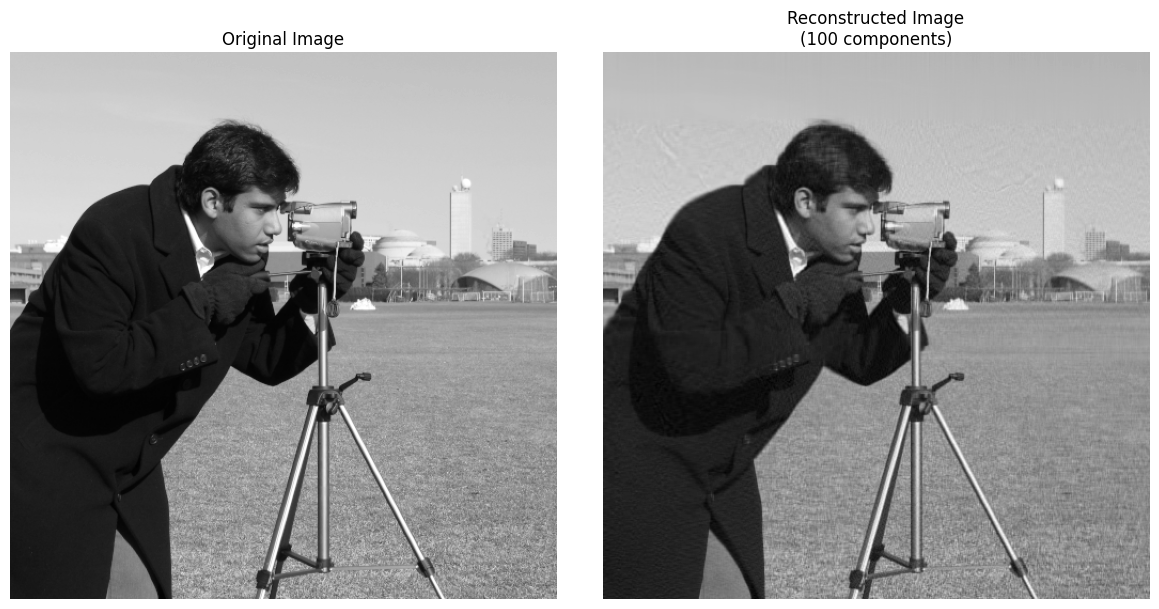

Compression ratio: 0.32
Explained variance ratio: 0.99


In [31]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from skimage import data

# Load a sample image
image = data.camera()

# Reshape the image
X = image.reshape(-1, image.shape[1])

# Perform PCA
n_components = 100  # Number of principal components to keep
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)
X_reconstructed = pca.inverse_transform(X_pca)

# Reshape back to image format
image_reconstructed = X_reconstructed.reshape(image.shape)

# Calculate compression ratio
original_size = image.nbytes
compressed_size = X_pca.nbytes + pca.components_.nbytes
compression_ratio = original_size / compressed_size

# Visualize original and reconstructed images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(image, cmap='gray')
ax1.set_title('Original Image')
ax1.axis('off')
ax2.imshow(image_reconstructed, cmap='gray')
ax2.set_title(f'Reconstructed Image\n({n_components} components)')
ax2.axis('off')
plt.tight_layout()
plt.show()

print(f"Compression ratio: {compression_ratio:.2f}")
print(f"Explained variance ratio: {np.sum(pca.explained_variance_ratio_):.2f}")
